# Mobile Price Prediction
Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("./train.csv")
print("Train dataset shape {}".format(train.shape))
train.head()

Train dataset shape (2000, 21)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
test = pd.read_csv("./test.csv")
print("Test dataset shape {}".format(test.shape))
test.head()

Test dataset shape (1000, 21)


,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [4]:
columns = train.columns.to_list()
train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
[[x,len(train[x].value_counts())] for x in columns]

[['battery_power', 1094],
 ['blue', 2],
 ['clock_speed', 26],
 ['dual_sim', 2],
 ['fc', 20],
 ['four_g', 2],
 ['int_memory', 63],
 ['m_dep', 10],
 ['mobile_wt', 121],
 ['n_cores', 8],
 ['pc', 21],
 ['px_height', 1137],
 ['px_width', 1109],
 ['ram', 1562],
 ['sc_h', 15],
 ['sc_w', 19],
 ['talk_time', 19],
 ['three_g', 2],
 ['touch_screen', 2],
 ['wifi', 2],
 ['price_range', 4]]

In [7]:
train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [8]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Target column => price_range

<Axes: >

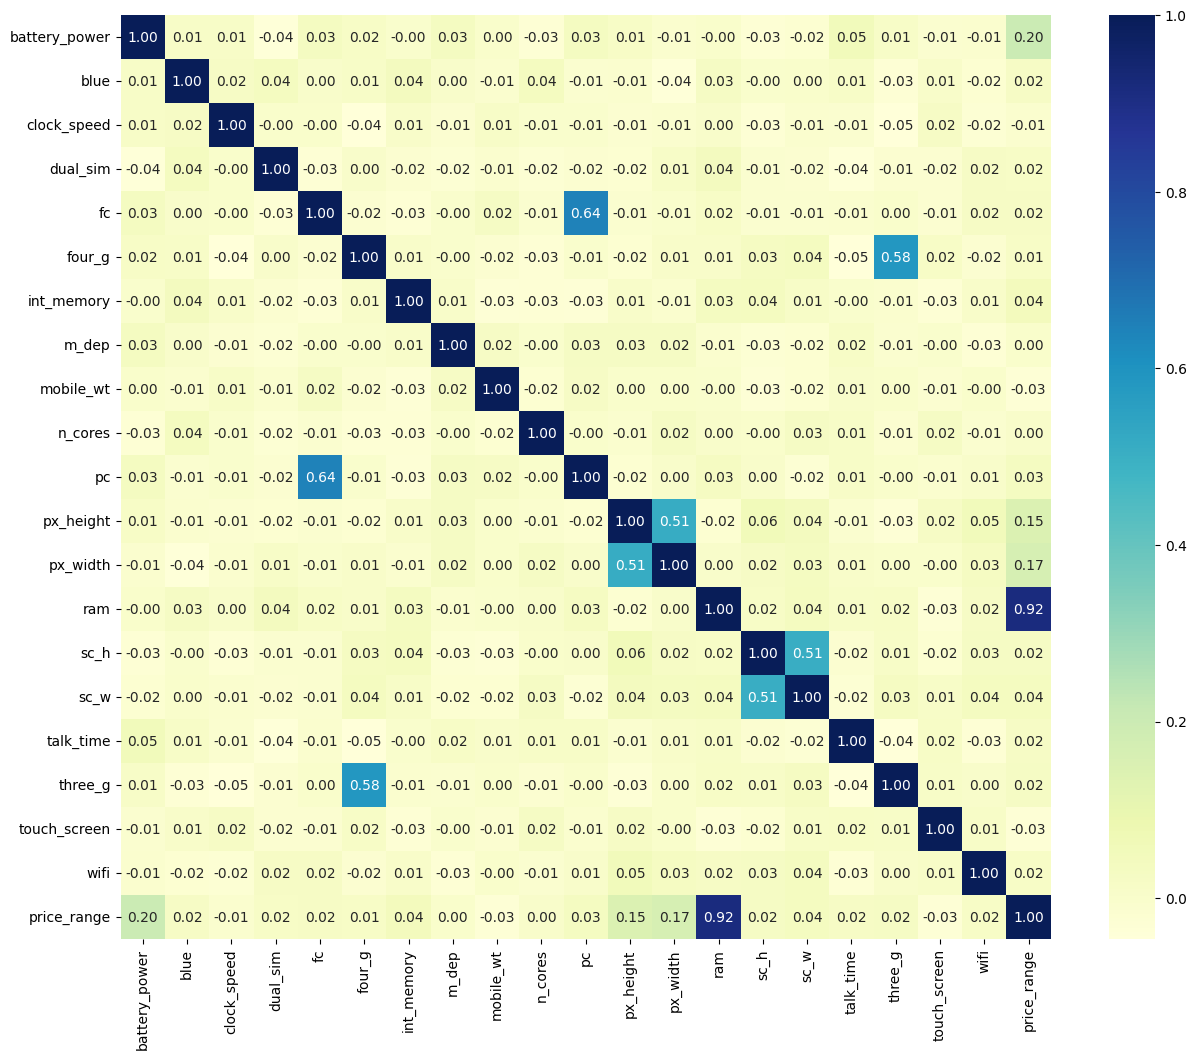

In [16]:
fig, ax = plt.subplots(1,1,sharex=True, figsize=(15,12))
sns.heatmap(train.corr(), fmt='.2f', cmap="YlGnBu", annot=True)

Observations: \
These factors most influence the price range of mobile
1) battery_power
2) px_height
3) px_width
4) ram

In [10]:
b_cols = ['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi']

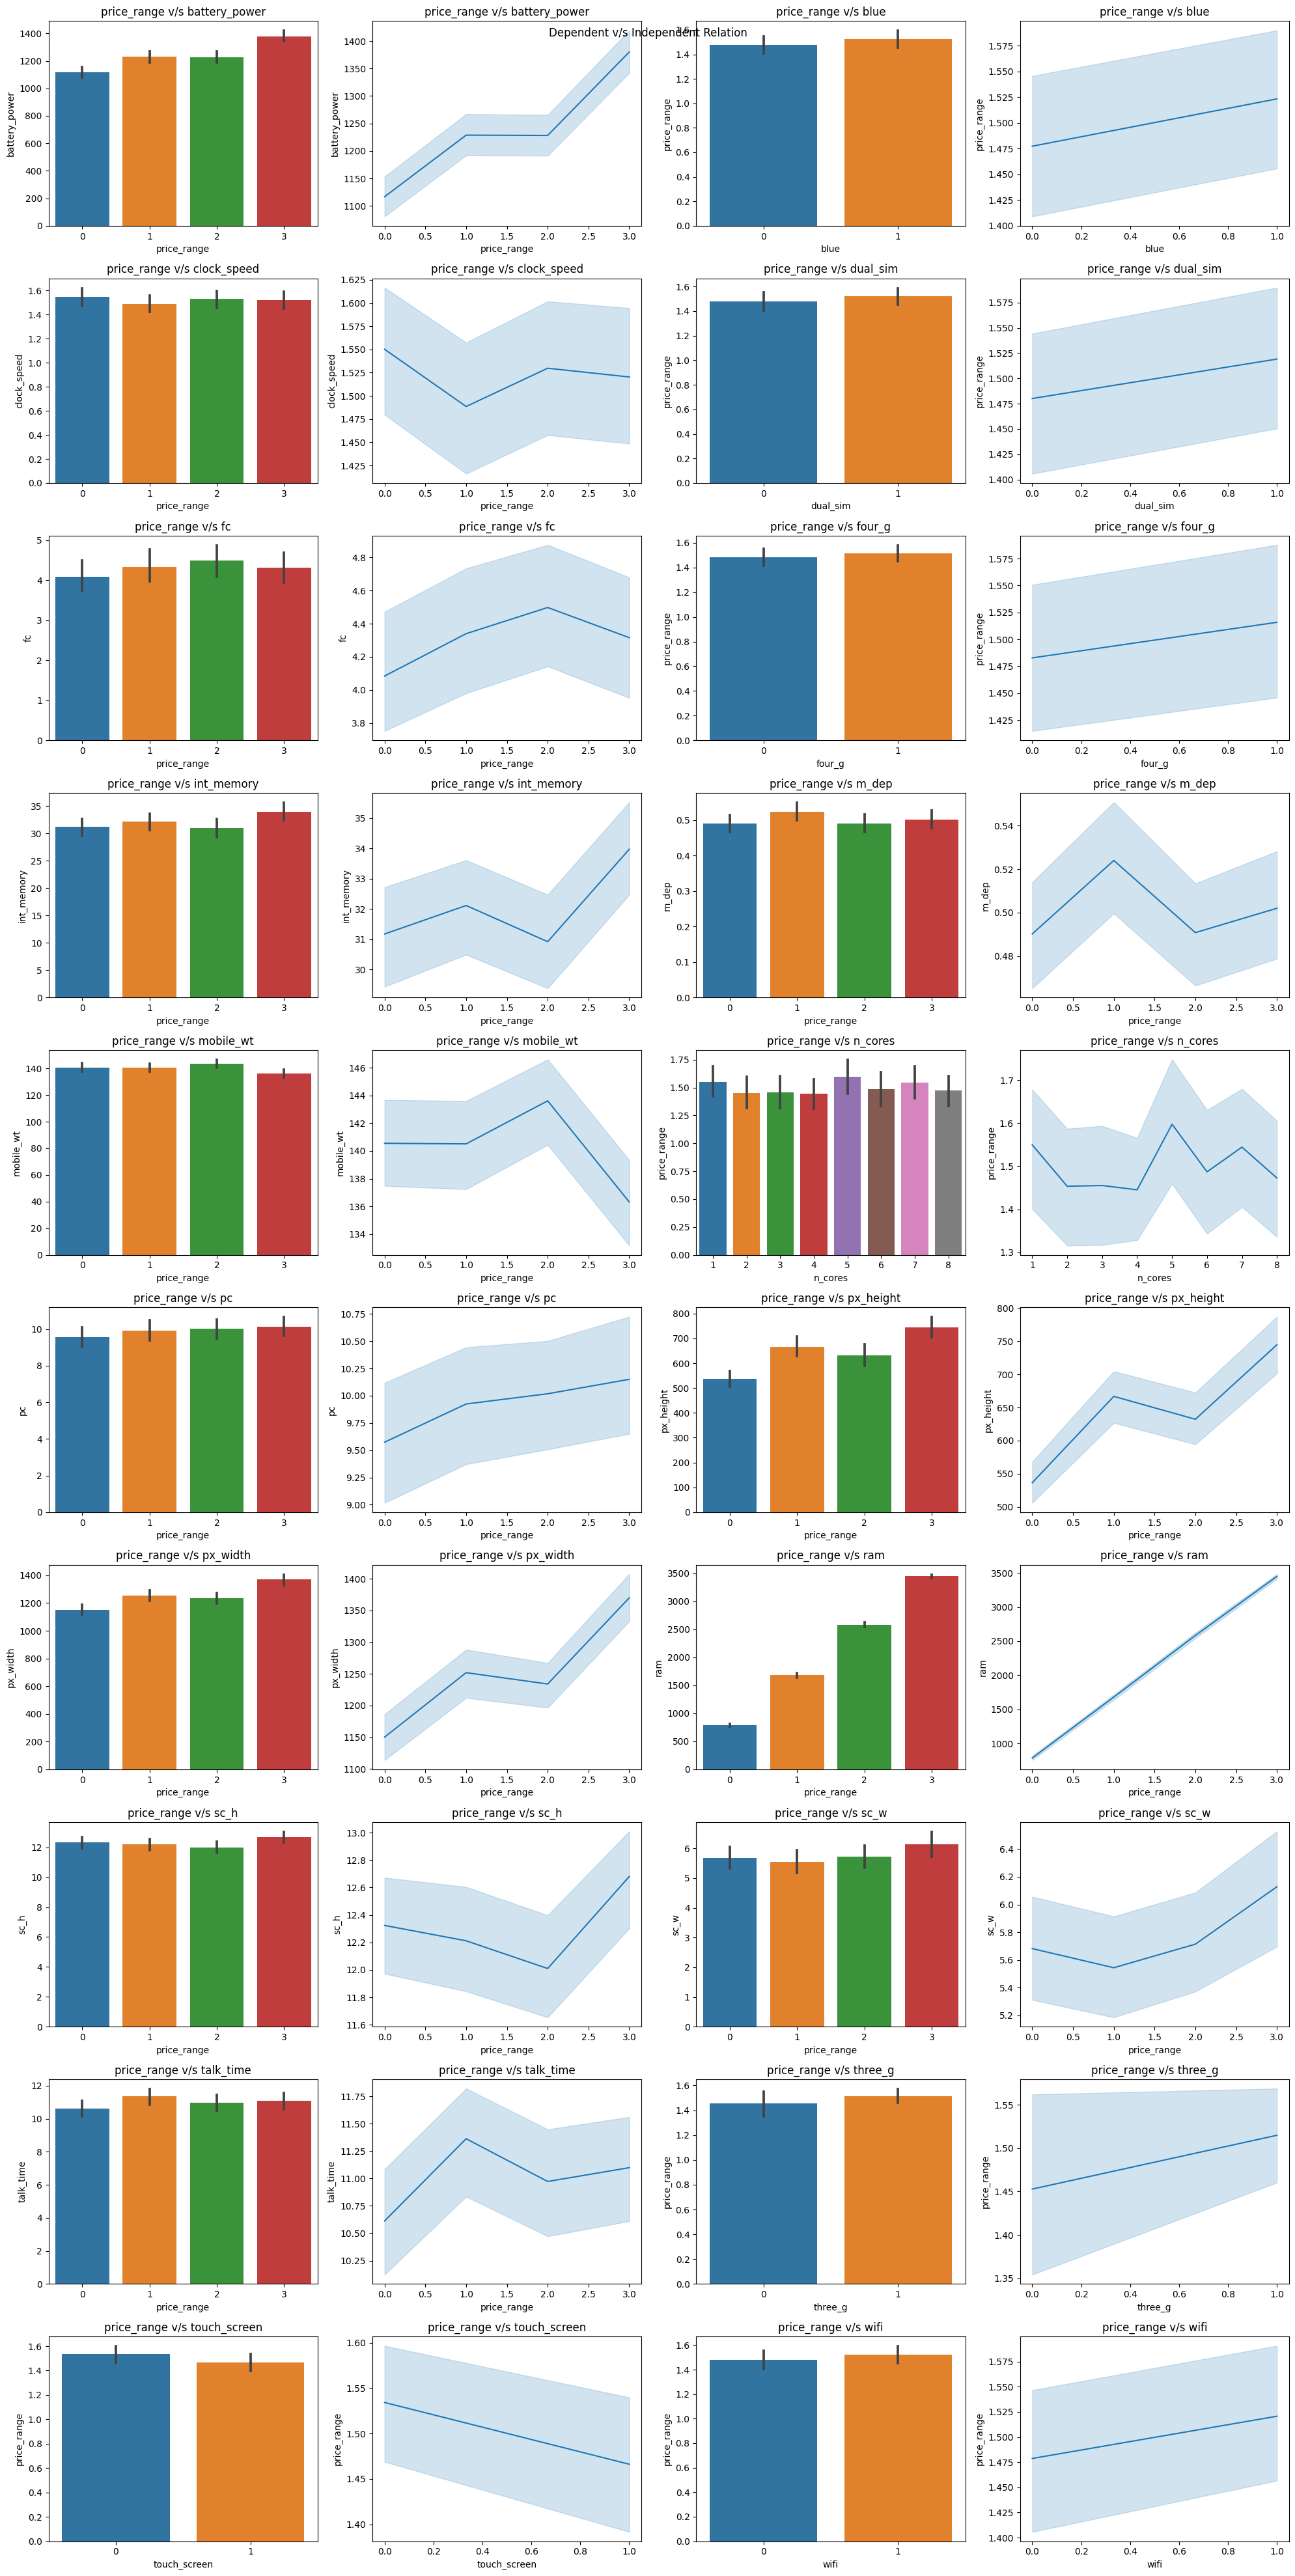

In [11]:
fig, axes = plt.subplots(10,4,figsize=(20,40))
fig.suptitle("Dependent v/s Independent Relation")
for i in range (len(columns)-1):
    posx = i // 2
    posy = i % 2 * 2
    axes[posx,posy].set_title(columns[20] + " v/s " + columns[i])
    axes[posx,posy+1].set_title(columns[20] + " v/s " + columns[i])
    if columns[i] not in b_cols:
        sns.barplot(data=train, x=columns[20], y=columns[i], ax=axes[posx,posy])
        sns.lineplot(data=train, x=columns[20], y=columns[i], ax=axes[posx,posy+1])
    else:
        sns.barplot(data=train, x=columns[i], y=columns[20], ax=axes[posx,posy])
        sns.lineplot(data=train, x=columns[i], y=columns[20], ax=axes[posx,posy+1])
plt.tight_layout()
plt.show()

# Observations:
- Battery Power
    - Price increase with increase in battery power 
- Bluetooth
    - Price increases with Bluetooth  
- Dual Sim
    - Price increases with Dual sim  
- 4G
    - Price increases with 4G 
- Primary Camera
    - Price increases with increase in pixels of primary camera

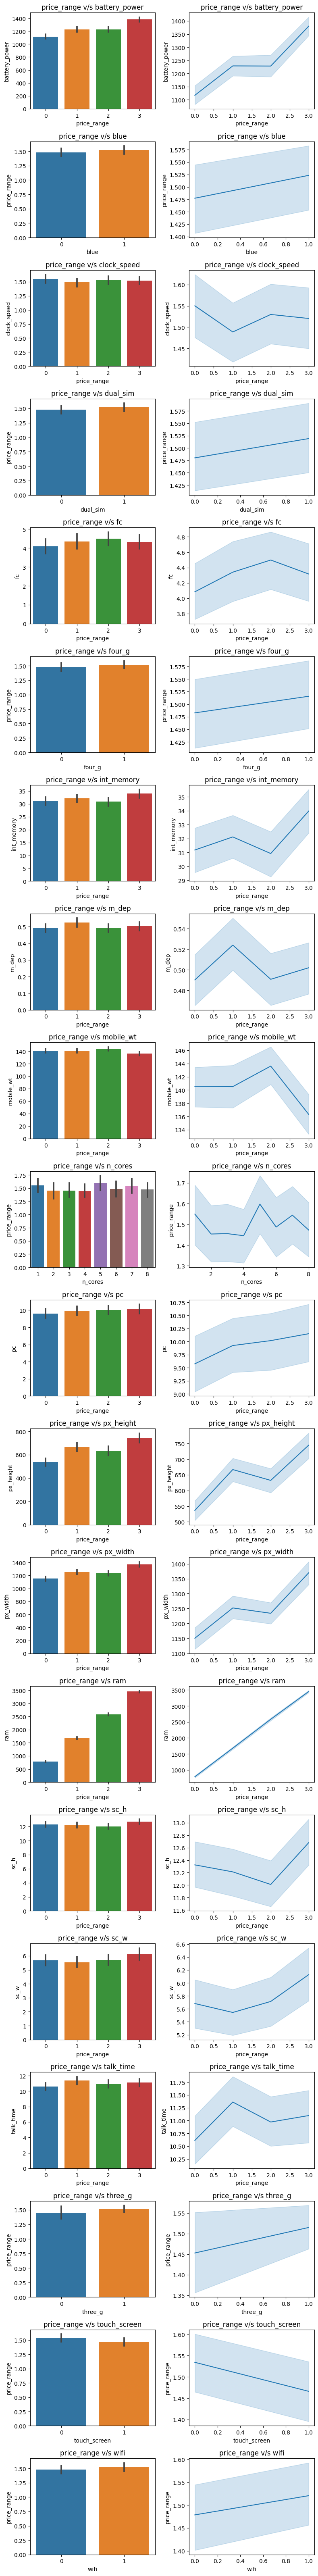

In [12]:
fig, axes = plt.subplots(20,2,figsize=(8,64))
for i in range (len(columns)-1):
    axes[i,0].set_title(columns[20] + " v/s " + columns[i])
    axes[i,1].set_title(columns[20] + " v/s " + columns[i])
    if columns[i] not in b_cols:
        sns.barplot(data=train, x=columns[20], y=columns[i], ax=axes[i,0])
        sns.lineplot(data=train, x=columns[20], y=columns[i], ax=axes[i,1])
    else:
        sns.barplot(data=train, x=columns[i], y=columns[20], ax=axes[i,0])
        sns.lineplot(data=train, x=columns[i], y=columns[20], ax=axes[i,1])
plt.tight_layout()
plt.show()

In [13]:
# train['blue'] = train['blue'].astype('category')
# train['dual_sim'] = train['dual_sim'].astype('category')
# train['four_g'] = train['four_g'].astype('category')
# train['three_g'] = train['three_g'].astype('category')
# train['touch_screen'] = train['touch_screen'].astype('category')
# train['wifi'] = train['wifi'].astype('category')
# train['price_range'] = train['price_range'].astype('category')

In [14]:
# test['blue'] = test['blue'].astype('category')
# test['dual_sim'] = test['dual_sim'].astype('category')
# test['four_g'] = test['four_g'].astype('category')
# test['three_g'] = test['three_g'].astype('category')
# test['touch_screen'] = test['touch_screen'].astype('category')
# test['wifi'] = test['wifi'].astype('category')